In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('tableau-colorblind10')

In [103]:
# чтение файла
df = pd.read_csv('task_6_bank_dataset.csv')

In [104]:
df

,userid,score,Gender,Age,Objects,Balance,Products,estimated_salary
0,15821574,783,М,38,9,114135.17,1,153269.98
1,15677342,634,М,52,1,NaN,2,176913.42
2,15771974,631,М,48,1,106396.48,1,150661.42
3,15703602,640,Ж,29,3,NaN,2,2743.69
4,15632379,684,Ж,41,7,NaN,1,138394.37
...,...,...,...,...,...,...,...,...
995,15613679,711,Ж,35,2,133607.75,1,120586.32
996,15794875,682,М,36,5,72373.62,2,36895.99
997,15845214,767,М,31,6,NaN,2,195668.00
998,15725157,683,Ж,30,2,NaN,2,100496.84


In [105]:
df.dtypes

userid                int64
score                 int64
Gender               object
Age                   int64
Objects               int64
Balance             float64
Products              int64
estimated_salary    float64
dtype: object

In [106]:
# чистка данных
df = df.convert_dtypes()

In [107]:
# поиск пустых значений
df.isnull().sum()

userid                0
score                 0
Gender                0
Age                   0
Objects               0
Balance             380
Products              0
estimated_salary      0
dtype: int64

In [108]:
# среднее баланса
df['Balance'].mean()

120237.07062903224

In [109]:
# заполнение пустых значений средним
df = df.fillna(value=round(df['Balance'].mean(), 2))

In [110]:
df

,userid,score,Gender,Age,Objects,Balance,Products,estimated_salary
0,15821574,783,М,38,9,114135.17,1,153269.98
1,15677342,634,М,52,1,120237.07,2,176913.42
2,15771974,631,М,48,1,106396.48,1,150661.42
3,15703602,640,Ж,29,3,120237.07,2,2743.69
4,15632379,684,Ж,41,7,120237.07,1,138394.37
...,...,...,...,...,...,...,...,...
995,15613679,711,Ж,35,2,133607.75,1,120586.32
996,15794875,682,М,36,5,72373.62,2,36895.99
997,15845214,767,М,31,6,120237.07,2,195668.0
998,15725157,683,Ж,30,2,120237.07,2,100496.84


In [111]:
df.isnull().sum()

userid              0
score               0
Gender              0
Age                 0
Objects             0
Balance             0
Products            0
estimated_salary    0
dtype: int64

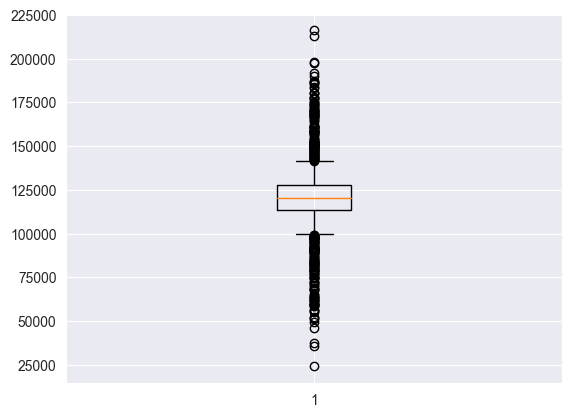

In [112]:
# проверка каждого параметра на box plot. Поиск аномалий
ax = plt.boxplot(df.Balance,
            whis=1, # параметр, определяющий длину уса
            data = df)

In [113]:
# явных аномалий не обнаруженно, единственный вопрос к Balance, так как размах получается 25.000/250.000, но такие данные вполне реальны

In [114]:
# категориальные признаки
df_disc = df.drop(['score', 'Balance', 'estimated_salary'], axis=1)

In [115]:
# непрерывные признаки
df_cont = df.drop(['Gender', 'Objects', 'Products', 'Age'], axis=1)

In [116]:
# расчет моды для категориальных
df_disc.drop(['userid'], axis=1).mode()

,Gender,Age,Objects,Products
0,М,40,1,1


In [117]:
# df_gender = df_disc.drop(['Age', 'Objects', 'Products'], axis=1).groupby('Gender').aggregate({'userid':'count'})

C:\Users\vsavc\AppData\Local\Temp\ipykernel_12700\1777869032.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


0 Gender
1 Objects
2 Products


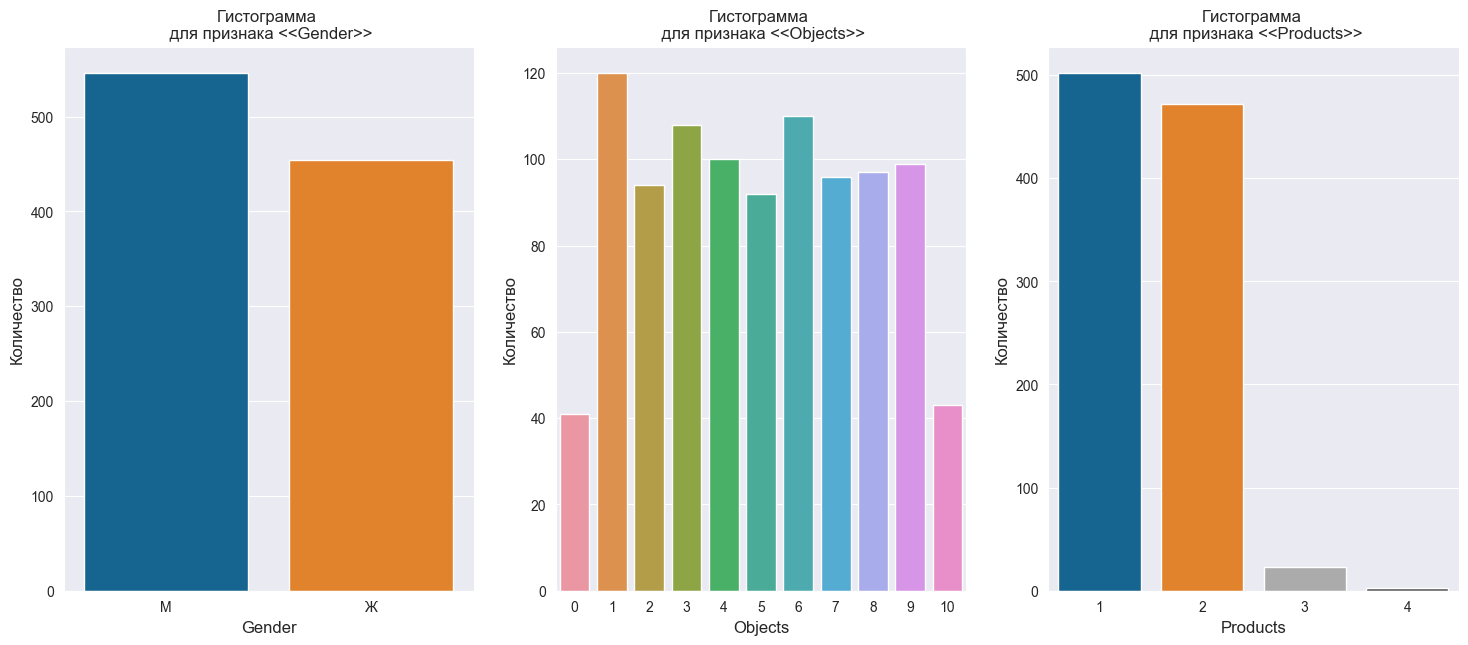

In [118]:
# построение графиков для пола, объектов, и продуктов
fig, axes = plt.subplots(1, sharey=True, figsize=(18,24))
i=0
for i, col in enumerate(df_disc.drop(['userid', 'Age'],axis=1).columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=col, data=df_disc.drop(['userid', 'Age'],axis=1))
    plt.title(f"Гистограмма \n для признака <<{col}>>")
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    print(i, col)

In [119]:
# подсчет значений для возрастных групп
df_Age = df_disc.drop(['Objects', 'Products', 'Gender'], axis=1).groupby('Age').aggregate({'userid':'count'})

In [120]:
df_Age

,userid
Age,
18,1
19,2
20,6
21,7
22,6
...,...
77,1
78,1
79,1


<BarContainer object of 61 artists>

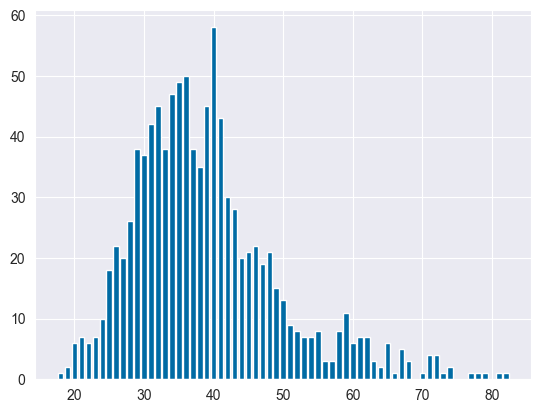

In [121]:
# построение графика возраста
x = df_Age.index
y = df_Age.userid

fig = plt.figure()
plt.bar(x, y)

In [122]:
# среднее для непрерывных параметров
df_cont[['score', 'Balance', 'estimated_salary']].mean(axis=0)

score                  646.85000
Balance             120237.07039
estimated_salary     98511.61867
dtype: float64

In [123]:
# медиана для непрерывных параметров
df_cont[['score', 'Balance', 'estimated_salary']].median(axis=0)

score                  645.000
Balance             120237.070
estimated_salary    100410.425
dtype: float64

In [124]:
# мода для непрерывных параметров
df_cont[['score', 'Balance']].mode(axis=0)

,score,Balance
0,850,120237.07


In [125]:
# мода для estimated_salary не встречается, так как все значения отличны друг от друга и её подсчет затруднителен
df_cont['score'].mode()[0]

850

In [126]:
# функция для подсчета нижного и верхнего усов для признака
def calc_boxplot(df_col:pd.Series) -> tuple:
    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col) <= hival, np.asarray(df_col))
    wisklo = np.compress(np.asarray(df_col) >= loval, np.asarray(df_col))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

In [189]:
#построение графика "ящик с усами" для отдельного признака с заменяемыми перцентилями
# визуализируем границы усов
import scipy
def box_plot(df, column):
    df_copy = df
    fig, ax = plt.subplots(1, figsize = (18, 6))
    plt.subplot(1,2,1)
    ax = sns.boxplot(y = df_copy[column]);
    plt.subplot(1,2,2)
    ax = sns.distplot(x = df_copy[df_copy[column] < 6][column],
                      bins = 100,
                      kde = False)
    ax.axvline(np.percentile(df_copy[column].dropna(), 1),
               color = 'orange',
               label = f'Перцентиль 1 -- {format(np.round(np.percentile(df_copy[column].dropna(), 1), 2))}')
    ax.axvline(np.percentile(df_copy[column].dropna(), 99),
               color = 'red',
               label = f'Перцентиль 99 -- {format(np.round(np.percentile(df_copy[column].dropna(), 99), 2))}')
    ax.axvline(np.percentile(df_copy[column].dropna(), 5),
               color = 'red',
               label = f'Перцентиль 5 -- {format(np.round(np.percentile(df_copy[column].dropna(), 5), 2))}')
    ax.axvline(np.percentile(df_copy[column].dropna(), 95),
               color = 'orange',
               label = f'Перцентиль 95 -- {format(np.round(np.percentile(df_copy[column].dropna(), 95), 2))}')

    ax.axvline(calc_boxplot(df_copy[column])[0],
               color = 'yellow',
               label = 'Нижний ус -- {}'.format(np.round(calc_boxplot(df_copy[column])[0], 2))
               )
    ax.axvline(calc_boxplot(df_copy[column])[1],
               color ='blue',
               label = 'Верхний ус -- {}'.format(np.round(calc_boxplot(df_copy[column])[1], 2)))
    ax.axvline(np.round(df[[column]].mean(axis=0)[0], 2),
               color ='green',
               label = 'Среднее значение -- {}'.format(np.round(df[[column]].mean(axis=0)[0], 2)))
    ax.axvline(np.round(df[[column]].median(axis=0)[0], 2),
               color ='pink',
               label = 'Медианное значение -- {}'.format(np.round(df[[column]].median(axis=0)[0], 2))
               )
    ax.axvline((np.round(df[column].mode()[0], 2)),
               color ='grey',
               label = 'Мода значение -- {}'.format(np.round(df[column].mode()[0], 2))
               )
    sns.histplot(data=df[column].astype('float64'), ax=ax, kde=True)
    plt.legend()
    plt.show()

C:\Users\vsavc\AppData\Local\Temp\ipykernel_12700\2162966284.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
C:\Users\vsavc\AppData\Local\Temp\ipykernel_12700\2162966284.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x = df_copy[df_copy[column] < 6][column],
C:\Users\vsavc\miniconda3\envs\Irina_6\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\vsavc\miniconda3\envs\Irina_6\lib\site-packages\numpy\core\_me

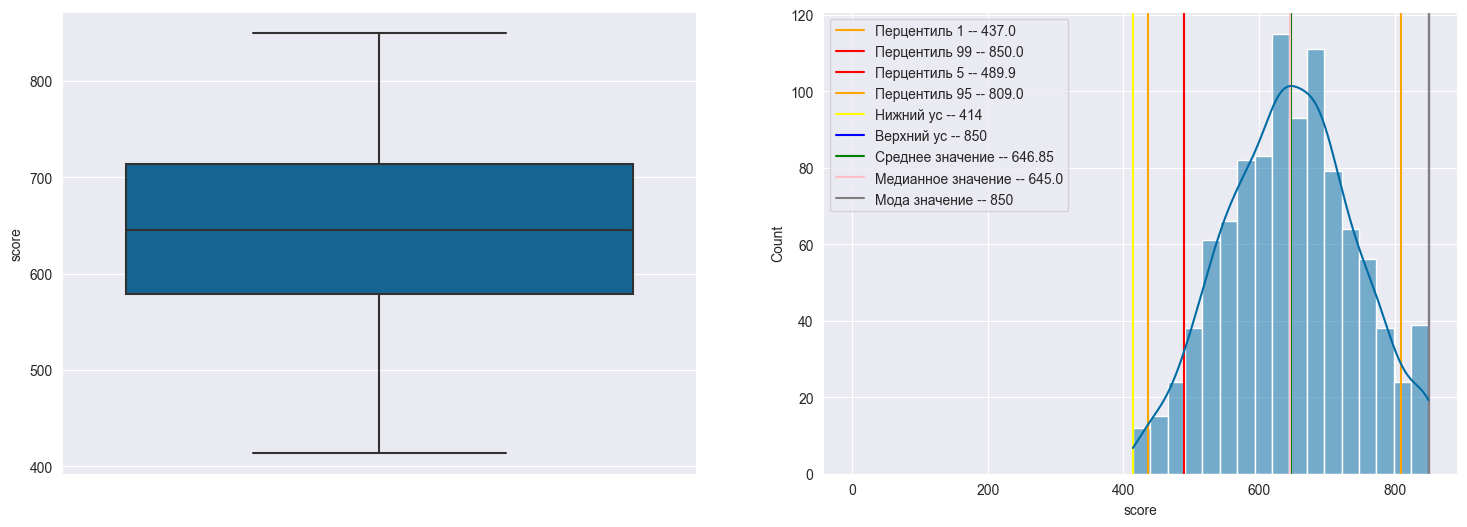

In [190]:
# box lot для score
box_plot(df, 'score')

C:\Users\vsavc\AppData\Local\Temp\ipykernel_12700\2162966284.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
C:\Users\vsavc\AppData\Local\Temp\ipykernel_12700\2162966284.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x = df_copy[df_copy[column] < 6][column],
C:\Users\vsavc\miniconda3\envs\Irina_6\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\vsavc\miniconda3\envs\Irina_6\lib\site-packages\numpy\core\_me

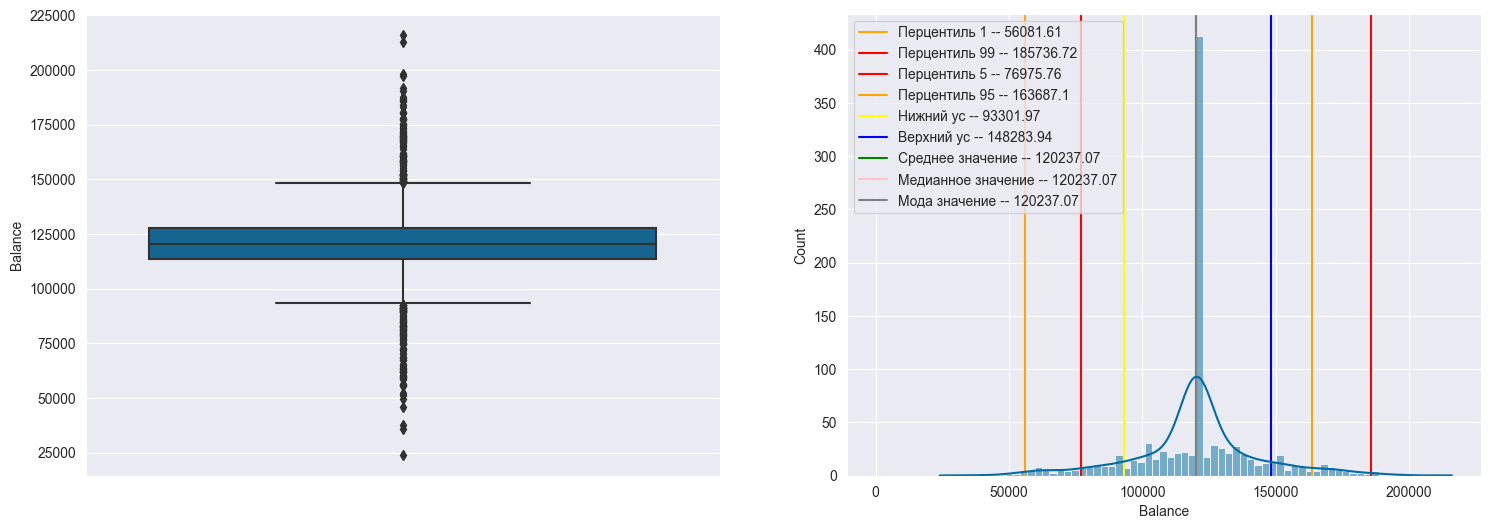

In [191]:
# box lot для Balance и пенцентилей 1, 99
box_plot(df, 'Balance')

C:\Users\vsavc\AppData\Local\Temp\ipykernel_12700\2162966284.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
C:\Users\vsavc\AppData\Local\Temp\ipykernel_12700\2162966284.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x = df_copy[df_copy[column] < 6][column],
C:\Users\vsavc\miniconda3\envs\Irina_6\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\vsavc\miniconda3\envs\Irina_6\lib\site-packages\numpy\core\_me

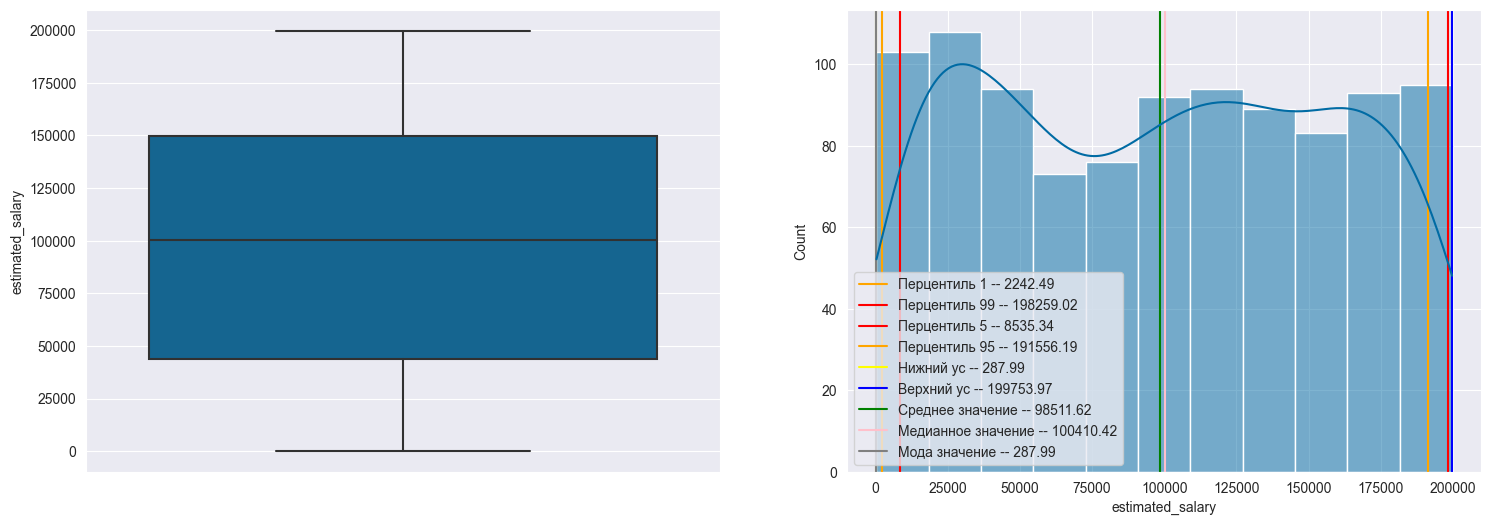

In [192]:
# box lot для estimated_salary и пенцентилей 1, 99
box_plot(df, 'estimated_salary')